## Find gene expression per atlas ROI

Gabriella Chan 27/06/23

Monash University

Simple module, pulls gene expression per atlas ROI from the AHBA using abagen. (Note; abagen 0.1.3 seems to require pandas<=1.5.3)

In [1]:
import abagen
import pandas as pd
import numpy as np
# import nibabel as nib
# import nibabel.processing
# import nilearn
# from nilearn import datasets, plotting
# import matplotlib.pyplot as plt
# from abagen import images
from scipy.stats import zscore
print ("imports done")

files = abagen.fetch_microarray(donors='all', data_dir='data-ahba')
print ("AHBA get")

atlas = {}

# Using Desikan Killiany
# atlas = abagen.fetch_desikan_killiany(data_dir='data-ahba')
# Using Schaefer 100 and Tian 32
atlas['image']='/scratch/kg98/gchan/Atlases/Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_MNI152NLin6Asym_1mm.nii.gz'
atlas['info']='/scratch/kg98/gchan/Atlases/ts132_info.csv'
abagen.images.check_atlas(atlas['image'], atlas['info'])
print("atlas get")
expression = abagen.get_expression_data(atlas['image'], atlas['info'], n_proc = 6)
print("expression get")

imports done
AHBA get
atlas get


/scratch/kg98/gchan/conda_envs/sir/lib/python3.8/site-packages/abagen/probes_.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reannotated.loc[:, 'entrez_id'] = reannotated['entrez_id'].astype('int')
/scratch/kg98/gchan/conda_envs/sir/lib/python3.8/site-packages/abagen/samples_.py:404: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gene_by_label = (microarray.groupby('label')
/scratch/kg98/gchan/conda_envs/sir/lib/python3.8/site-packages/abagen/samples_.py:404: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gene_by_label = (microarray.groupby('label')
/scratch/kg98/gchan/conda_envs/sir/lib/p

expression get


In [2]:
# trim for LH only
expr= expression.iloc[16:82,:]
print(expr.shape)

(66, 15633)


In [4]:
# filters for a subset of genes. e.g. genes with GO annotations.
GO_genes = pd.read_csv("data/GO_IDA_Homo-sapiens_prot_uniq.csv", header=None)

gene_expr = {}
genes = []
for gene in GO_genes.iloc[:,0]:
    # print(gene)
    try:
        gene_expr[gene] = expr[gene][:]
        genes.append(gene)
    except Exception:
        pass
expr = pd.DataFrame(data = gene_expr)

expr_z = expr.apply(zscore)
# To handle NaNs
# expr_z = (expr - expr.mean())/expr.std(ddof=0)

expr.to_csv('results/gene_expr_TS132.csv', index=False)
expr_z.to_csv('results/gene_expr_TS132_z.csv', index=False)
genes.to_csv('results/all_annotated_AHBA_GO_genes.csv', index=False)

In [16]:
print(expression.shape)

(132, 15633)


In [22]:
# now do the same, but for LAMP1-5 and Ubiquitin
expr_df = {}
expr_df['gba'] = expression[["GBA"]].apply(zscore)
expr_df['snca'] = expression[["SNCA"]].apply(zscore)
expr_df['lamp'] = expression[["LAMP1", "LAMP2"]].apply(zscore)
expr_df['ubq'] = expression[["RPS27A", "UBA52", "UBB", "UBC"]].apply(zscore)

for gene in expr_df:
    expr_df[gene].to_csv('data/' + gene + '.csv', index=False)
    
# expr_df.to_csv('data/DK_ROI_gene_expr.csv', index=False)
# expr_z_df.to_csv('data/DK_ROI_gene_expr_z.csv', index=False)

(121, 145, 121)


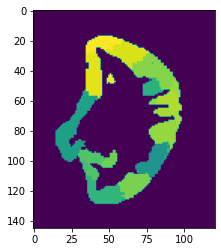

(array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,    1. ]]), 2)
(121, 145, 121)


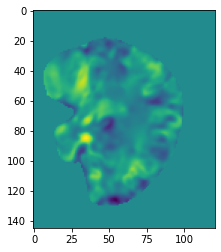

In [22]:
from abagen import images

# print(atlas['image'])
# atlas = images.check_atlas(atlas['image'], atlas['info'])

# dk_atlas = abagen.fetch_desikan_killiany(data_dir='data-abagen')

# dk_atlas_img = nib.load(dk_atlas['image'])
# print(dk_atlas_img.get_sform(coded=True))
# print(dk_atlas_img.shape)
# dk_atlas_data = dk_atlas_img.get_fdata()
# plt.imshow(dk_atlas_data[50,:,:])
# plt.show()

# dk_atlas_img = nib.processing.conform(dk_atlas_img, voxel_size=(1.5, 1.5, 1.5))
# dk_atlas_data = dk_atlas_img.get_fdata()
# plt.imshow(dk_atlas_data[50,:,:])
# plt.show()

s100_img = nib.load('../Atlases/Schaefer_Parcellations/MNI/Schaefer2018_100Parcels_1.5mm/Schaefer2018_100Parcels_Kong2022_17Networks_order_FSLMNI152_1.5mm.nii.gz')
# print(bgs_t_img.get_sform(coded=True))
print(s100_img.shape)
s100_data = s100_img.get_fdata()
plt.imshow(s100_data[40,:,:])
plt.show()

bgs_t_img = nib.load('./GMV difference maps/braingluschi/T/swe_vox_Tstat_c01.nii')
print(bgs_t_img.get_sform(coded=True))
print(bgs_t_img.shape)
bgs_data = bgs_t_img.get_fdata()
plt.imshow(bgs_data[40,:,:])
plt.show()

In [45]:
s300_dataset = datasets.fetch_atlas_schaefer_2018('300')
s300_atlas_filename = s300_dataset.maps
s300_img, labels = datasets.fetch_atlas_schaefer_2018('300')

plotting.plot_roi(s300_atlas_filename)

NameError: name 'datasets' is not defined

In [39]:
dk_filled_vox = {}
roi_coords = {}
roi_atrophy = {}
bg_grey = 0
bg_count = 0

for i in range (1,182):
    for j in range (1,155):
#         print (dk_atlas_data[50][i][j])
        if (dk_atlas_data[5][i][j] > 0):
            roi = dk_atlas_data[5][i][j]
            grey = bgs_data[5][i][j]
            try:
                roi_coords[roi].append([i, j])
                roi_atrophy[roi].append(grey)
            except:
                roi_coords[roi] = [[i, j]]
                roi_atrophy[roi] = [grey]
        else:
            bg_grey += bgs_data[5][i][j]
            bg_count += 1

for roi in roi_coords:
    print (roi, (sum(roi_atrophy[roi])/len(roi_atrophy[roi])), sum(roi_atrophy[roi]), len(roi_atrophy[roi]))
    
print ((bg_grey/bg_count), bg_grey, bg_count)
# print (int(dk_atlas_data[50][2][75]) )
            
# print(dk_atlas_data[50,:,:], '\n')
# print(bgs_data[50,:,:])


14.0 0.5303293186949132 425.32411359332036 802
29.0 -0.947278083754768 -550.3685666615202 581
30.0 0.01485419705439765 4.441404919264897 299
1.0 -0.32712980806827546 -3.2712980806827545 10
8.0 1.6181989179717169 58.25516104698181 36
21.0 -0.14590800355116287 -34.14247283097211 234
0.025123161094294223 650.9913502753519 25912


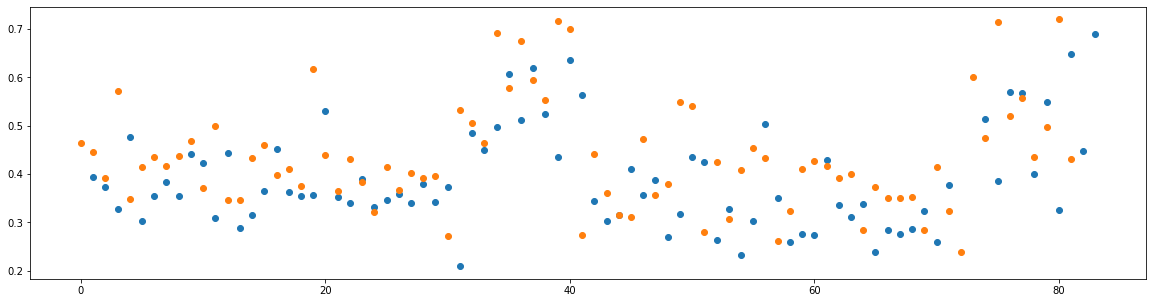

In [44]:
# %matplotlib qt
%matplotlib inline
import matplotlib.pyplot as plt

# expr_df['CDR1'].plot()
expr_df_82 = pd.read_csv('./DK_ROI_gene_expr.csv')
# expr_df_82['CDR1'].plot()
plt.figure(figsize=(20,5))
plt.scatter(expr_df.index, expr_df['CDR1'])
plt.scatter(expr_df_82.index, expr_df_82['CDR1'])



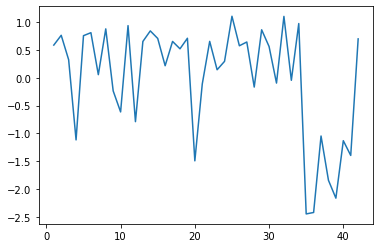

In [45]:
import matplotlib.pyplot as plt
plt.plot(SNCAz)